## Clasifying Heart Diseases

This project uses a real life dataset which contain information on various patinet characteristics such as age, chest pain to classify the presence of heart disease in thoe individual by using the logistic regression model as the binary classifier.

Based on the [heart](https://archive.ics.uci.edu/dataset/45/heart+disease) dataset extracted from the UCI machine learning repository each variable/columns of the dataset is defined as below.


- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholesterol in mg/dl
- `fbs`: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2 = downsloping)
- `ca`: number of major vessels (0-3) coloured by fluoroscopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversible defect
- `present`: diagnosis of heart disease (angiographic disease status) (0 = no; 1 = yes)


In [70]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Data Exploration

In [71]:
heart=pd.read_csv('heart_disease.csv')
from IPython.display import display
display(heart.head()) # Exploaring the first few rows

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [72]:
heart=heart.drop('Unnamed: 0',axis=1) # drop the uniqueID column 
heart.info() # Explorying the data type of each variable 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  present   303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


- `ca` and `thal` are two variables with string dtype and rest of the variables are in the numeric dtype.
- Although `sex`column contain numeric dtype, it contains binary values of 0 and 1 representing two classes of gender and will be considered as a categorical variable.

#### Exploaring 'ca' and 'thal' variables

In [73]:
print(heart['ca'].value_counts())
print(heart['thal'].value_counts())

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64
3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64


- Both `ca` and `thal` columns have a value **?** which doesn't carry any information and it could cause erraneous results in the data analysis process.
- As this value contains only a few numbers, all values containg **?** should be dropped before feeding the data to machine learning model.

In [74]:
 # droping the '?' value from both variables 'thal' and 'ca' and converting it to a numeric dtype.
heart=heart[heart['ca']!='?']
heart['ca']=heart['ca'].astype(float)

heart=heart[heart['thal']!='?']
heart['thal']=heart['thal'].astype(float)

### Visualizing the distribution of features against the target variable ('present')

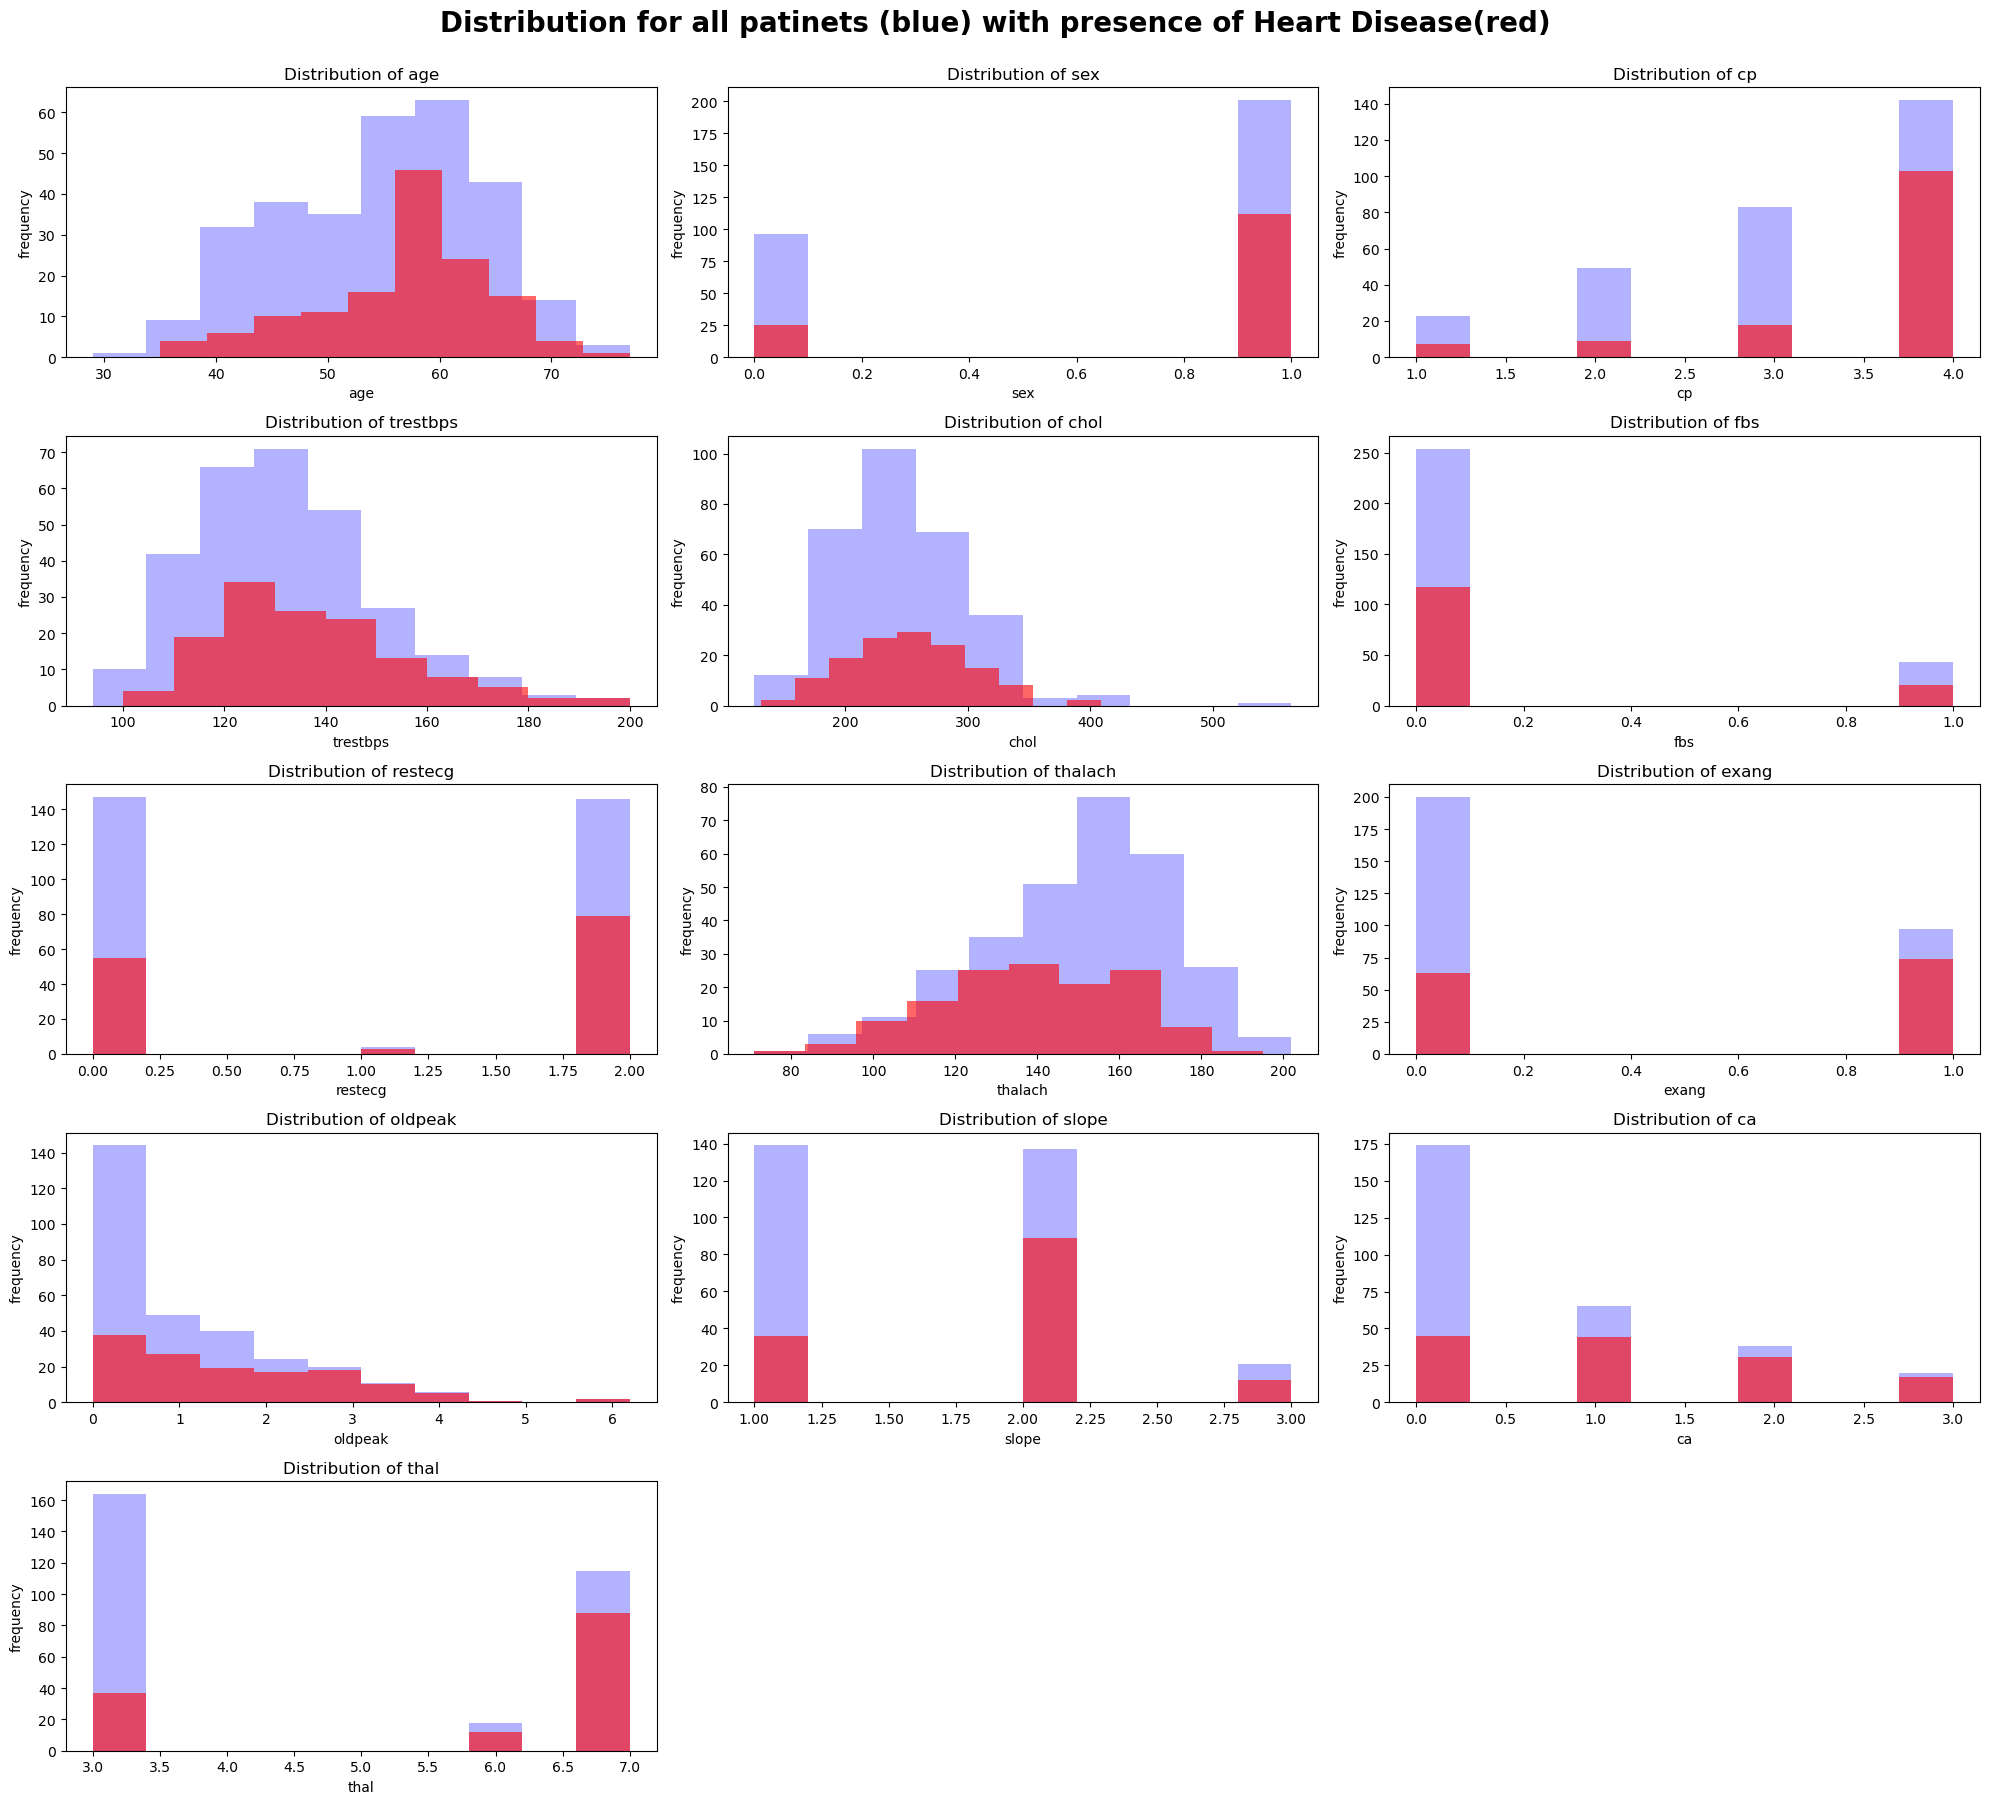

In [75]:
features=heart.drop('present',axis=1)
columns=list(features)

fig=plt.figure(figsize=(20,18))

plt.suptitle('Distribution for all patinets (blue) with presence of Heart Disease(red)',fontsize=20,y=1,weight='bold')

for i,col in enumerate(columns):
    ax=fig.add_subplot(5,3,i+1)
    plt1=ax.hist(features[col],color='b',alpha=0.3)
    plt2=ax.hist(heart[heart['present']==1][col],color='r',alpha=0.6)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('frequency')
plt.tight_layout()  
plt.show()
    

- `oldpeak`shows a rights-skewed distribution which shows a high likelihood of patinets getting a cardiac disease with the increase of its value.
- `thalach` has a left skewed distribution with significant difference of its distribution for the presence of cardiac disease or not.
- `chol` variable shows an normal distribution with not much difference between its distribution with the outcome.
- `tresbps` shows a slightly left-skewed distribution with not much difference between its distribution with the outcome.
- `age` shows a slightly right-skewed distribution with not much difference between its distribution with the outcome.
- Although the classes of `sex`,`restecg` and `fbs` variables dont have an equal represenation in the dataset, each class shows faily equal distribution for each class of the outcome.
- `cp`,`thal`,`exang`,`ca` are categorical variables that show a distinct difference in their distribution for presence of cardiac disease.
- `slope` categorical variable has two classes that shows a great difference in their distribution on presence of cardiac disease along with a one class of this variable that shows an equal distribution with the change of outcome.
- Due to non significance of the difference, the variables `chol`,`restecg`,`age`,`sex`,`tresbps`,`fbs`can be omitted from the predictors list while keeping the rest as predictors.

### Visualizing the correlation of each variable with the predictor

<AxesSubplot:>

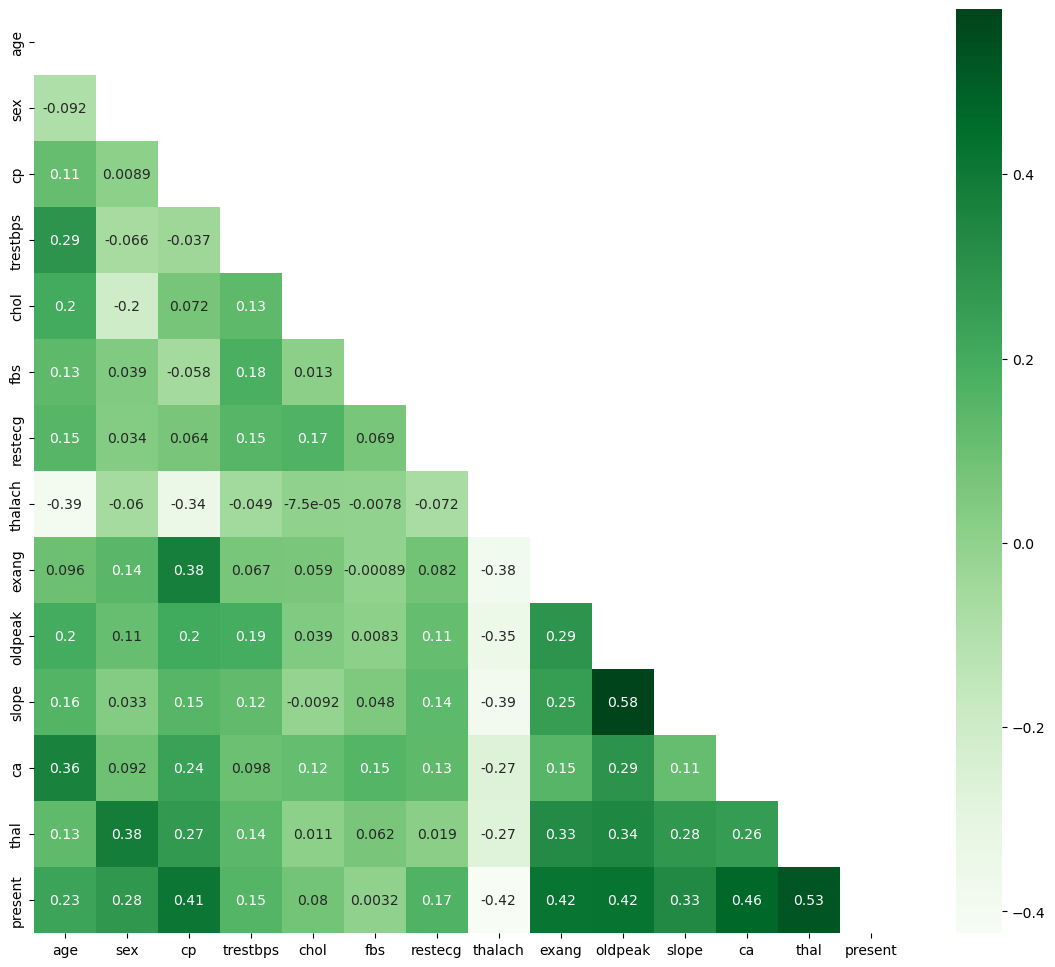

In [76]:
correlation=heart.corr()
plt.figure(figsize=(14,12))
mask=np.triu(np.ones_like(correlation))
sns.heatmap(correlation,cmap='Greens',annot=True,mask=mask)


- `thal`,`ca`,`oldpeak`,`exang`,`cp`,`slope` have positive correlation with the outcome 'present'.
- `thalach` has a negative correlation with the target variable or outcome 'present'.
- Rest of the variables don't show a much strong correlation with the target variable.


**Based on the distribution of each variable with the predicted outcome, varibales `thal`,`ca`,`oldpeak`,`exang`,`cp`,`slope`,`thalach` were selected as the predictors to use for data analysis due to significance difference of their distribution with the results of ouctome.**

### Building the model 

In [77]:
# Splliting the dataset to test and training data 
X=heart[['thal','ca','oldpeak','cp','slope','thalach']]
y=heart['present']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=739)

#Check if the both test and training data reprsent both cases and non-cases of outcome
print('Test set :')
print(y_train.value_counts())
print('Trainig set:')
print(y_test.value_counts())

# Building a Logistic Rgression model 
model=LogisticRegression()
scaler=StandardScaler() #standardizing the feature dataset
X_train=scaler.fit_transform(X_train) 
X_test=scaler.transform(X_test)
model.fit(X_train,y_train) # Fit the traning data to the model 

Test set :
0    130
1    107
Name: present, dtype: int64
Trainig set:
1    30
0    30
Name: present, dtype: int64


LogisticRegression()

Both training and test sets represents the case and non-case instances of the traget variable or the outcome. Training set has equal representation for both instances with a 50% data representing  cases and rest of the 50% for non-cases. Test set also does a fairly well representation for both instances of the outcome.

### Evaluating the model 

#### Calculating the overall accuracy of the model 

In [78]:
Training_accuracy= model.score(X_train,y_train)
print(f'training_accuracy : {Training_accuracy}')
test_accuracy=model.score(X_test,y_test)
print(f'test_accuracy : {test_accuracy}')

training_accuracy : 0.869198312236287
test_accuracy : 0.7666666666666667


Test accuracy is about 10% off from the training accuracy, which both are not great values. So, it may need to re-evaluate the relevance of the predictors used in the model and reduce the model complexity to avoid overfitting  of the data to gain a better accuracy for the model.

#### Training Sensitivity and Specificity of the model 

Training sensitivity: 0.822429906542056
Training specificity: 0.9076923076923077


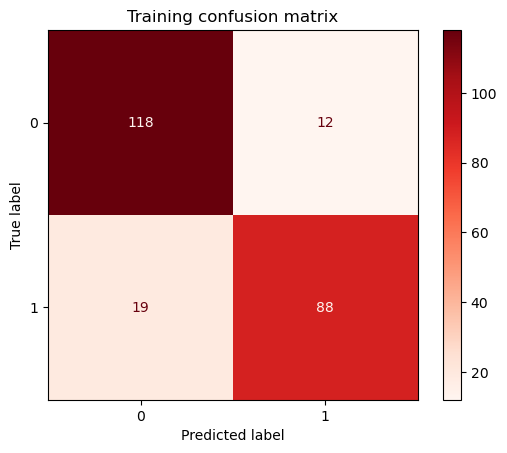

In [79]:
train_predictions= model.predict(X_train)
summary=confusion_matrix(y_train,train_predictions)
ConfusionMatrixDisplay(summary).plot(cmap='Reds')
plt.title('Training confusion matrix')

TP=summary[1,1]
FP=summary[0,1]
TN=summary[0,0]
FN=summary[1,0]

Sensitvity=TP/(TP+FN)
print(f'Training sensitivity: {Sensitvity}')
Specificity=TN/(TN+FP)
print(f'Training specificity: {Specificity}')


- Knowing the specificity and sensitivity of the data is importatnt to understand the linkelihood of model predicting the correct outcome for the patinets.

- **Training sensitivity is about 82 %**, which means knowing the patient has a heart diseases, likelihood of correctly identifying them of having a heart dieases is only 82% and there is about  **20% of chnace that the model would not correctly identify the presence of a heart disease**. This can be considered as a more dangerous incident as the model has failed to recognize the presence of the disease.So, knowing the count of false negatives provides an important information about model's sensitivity to predict cases.

- **Training specificity is about 90%**, which means knowing that patient does not have a cardiac disease, likelihood of correctly veryfying/identification of the not presence of a cardiac disease is 90%. But **there is a 10% chance of model incorrectly labelling those individuals as having a cardiac disease** although they don't, it can cause them to go under further testings and investingations and somehow true results can be verified during clinicals. This scenario is less severe compared to not identifying the presence of the disease at all.  

#### Positive Predictive Value (PPV) and Negative Predictive Value (NPV) of the model 

Evaluating the truthfulness of the test predictions made,when the test data set is presented on the model,can be meassured using PPV and NPV

Positive Predictive Value :0.88
True Negative Value :0.8613138686131386


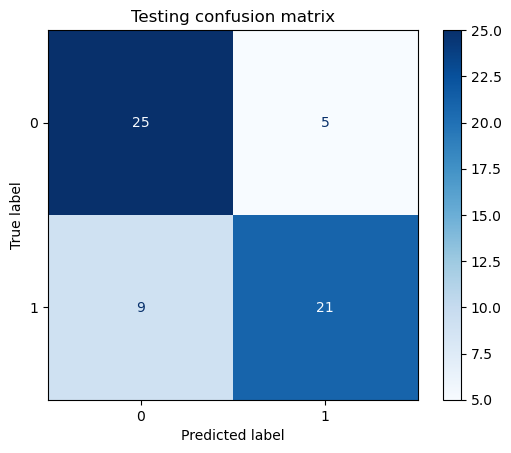

In [80]:
test_predictions= model.predict(X_test)
test_summary=confusion_matrix(y_test,test_predictions)
ConfusionMatrixDisplay(test_summary).plot(cmap='Blues')
plt.title('Testing confusion matrix')

test_TP=summary[1,1]
test_FP=summary[0,1]
test_TN=summary[0,0]
test_FN=summary[1,0]



PPV=test_TP/(test_TP+test_FP)
print(f'Positive Predictive Value :{PPV}')
NPV=test_TN/(test_TN+test_FN)
print(f'True Negative Value :{NPV}')

 - **PPV of 88%** means, when the model predictions are cases, which means presence of a cardiac disease is True, 88 % of them were lablelled correctly and about 12 % of them which were actually non casses were incorrectly labelled as cases.
 - **NPV of 86%** means, when the model predictions are non-cases, which means teh presence of the cardiac disease is False, 86%  of them were correctly labeled as non cases while 14% of them which were actually cases were incorrectly labelled as non cases. **This 14% of incorrect labelling of actual cases as non cases has more severe impact on the model's performance.**

#### Testing Sensitivity and Specificity of the model 

In [81]:
test_sensitvity=test_TP/(test_TP+test_FN)
print(f'Testing sensitivity: {test_sensitvity}')
test_specificity=test_TN/(test_TN+test_FP)
print(f'Testing specificity: {test_specificity}')

Testing sensitivity: 0.822429906542056
Testing specificity: 0.9076923076923077


### Intepreting the Model co-efficients

In [82]:
coefs=model.coef_
coefs=coefs.T
predictors=['thal','ca','oldpeak','cp','slope','thalach']
df_coefs=pd.DataFrame(coefs,index=predictors,columns=['Log_Odds']).sort_values(by='Log_Odds',ascending=False)
df_coefs['Odds_ratio']=np.exp(df_coefs['Log_Odds'])
display(df_coefs)

,Log_Odds,Odds_ratio
thal,0.883720,2.419884
ca,0.870625,2.388402
cp,0.717564,2.049434
oldpeak,0.484850,1.623931
slope,0.197771,1.218683
thalach,-0.449715,0.637810


Based on the above results, odd ratio for a specific variable is calculated as the ratio between the odds for change of outcome in a binary classifier when all other variables are kept constant. 
- Higher the value of the odds_ratio, it denotes there is a higher success probability which means a high likelihood of the presence of a cardiac disease. 
- Since  all variables, 'thal','ca','oldpeak','cp','slope' have a odds ratio of higher than 1, it suggests with the increase of these factors an individual has a higher chnaces of getting a cardiac disease. 
- `thalach` has an odds ratio below 1, which suggests, when the the value of this variable increases,success probability decreases, which means less likelihood of getting a cardiac disease. Based on the domain knowledge it proves this fiding, as `thalach` meassures the maximum heart rate, more healthier individuals can have higher maximum heart rate.

### Conclusion

- By comaring the meassures to evaluate the model performance based on training and testing datasets,the model accuracy on the test dataset has decreased about 10% from that of the training dataset, which is expected in a pretty generalized model.So, model only has a testing accuracy of 77% which indicates there is 23% chnace of model predicting the wrong ouctome when classifying the presence of heart disease in individuals.
- Although test accuracy obained here is low to be called as a good model,more importance is given  to model's ability of correcctly predicting the cases rather than non cases. 
- information about model's ability to correctly predict the cases is gained through the model sensitivity where both testing and training datasets have a value of 82% as the likelihood og correclty labelling cases as cases. 
- Based on this information, there is 18% chance of model incorrectly labelling cases as non-case through false negatives which is the most dangerous risk that leave patients without recognizing them as a cardiac patient at all. 
- Using this model can cause 18 % failure of diesease diagnosis that can lead people die due to the fatality of not diagnosiing the presence of the disease. 
- So, in order to use this model in the real worls applications, the model should be imporoved to have a faily high model accuray on test dataset with definetely very less false negatives.
- This can be achieved by reducing the model complexity by choosing only the predictors that make a significant impact on the outcome and chaging various model parameters including test size of the data or trying a different classification model. 